<pre>
1. Download the data from <a href='https://drive.google.com/file/d/15dCNcmKskcFVjs7R0ElQkR61Ex53uJpM/view?usp=sharing'>here</a>

2. Code the model to classify data like below image

<img src='https://i.imgur.com/33ptOFy.png'>

3. Write your own callback function, that has to print the micro F1 score and AUC score after each epoch.

4. Save your model at every epoch if your validation accuracy is improved from previous epoch. 

5. you have to decay learning based on below conditions 
        Cond1. If your validation accuracy at that epoch is less than previous epoch accuracy, you have to decrese the
               learning rate by 10%. 
        Cond2. For every 3rd epoch, decay your learning rate by 5%.
        
6. If you are getting any NaN values(either weigths or loss) while training, you have to terminate your training. 

7. You have to stop the training if your validation accuracy is not increased in last 2 epochs.

8. Use tensorboard for every model and analyse your gradients. (you need to upload the screenshots for each model for evaluation)

9. use cross entropy as loss function

10. Try the architecture params as given below. 
</pre>

<pre>
<b>Model-1</b>
<pre>
1. Use tanh as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-2</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use RandomUniform(0,1) as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-3</b>
<pre>
1. Use relu as an activation for every layer except output layer.
2. use SGD with momentum as optimizer.
3. use he_uniform() as initilizer.
3. Analyze your output and training process. 
</pre>
</pre>
<pre>
<b>Model-4</b>
<pre>
1. Try with any values to get better accuracy/f1 score.  
</pre>
</pre>

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from tensorflow.keras.layers import Dense,Input,Activation
from tensorflow.keras.models import Model
import random as rn
import tensorflow as tf
from sklearn.metrics import f1_score
from sklearn.metrics import roc_auc_score
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import LearningRateScheduler
import datetime

In [2]:
data = pd.read_csv('data.csv')
data.head()

,f1,f2,label
0,0.450564,1.074305,0.0
1,0.085632,0.967682,0.0
2,0.117326,0.971521,1.0
3,0.982179,-0.380408,0.0
4,-0.720352,0.955850,0.0


In [3]:
data.shape

(20000, 3)

In [4]:
X = data.drop(['label'],axis=1).values
y = data['label'].values

X_train,X_test,y_train,y_test = train_test_split(X , y , test_size=0.30, stratify=y)
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(14000, 2)
(14000,)
(6000, 2)
(6000,)


### Writing Custom callbacks

In [16]:
# Writing a callback function that prints micro F1 score and AUC score after each epoch.

class Metrics(tf.keras.callbacks.Callback):
    def __init__(self,val_data):
        self.x_val = val_data[0]
        self.y_val = val_data[1]
    
    def on_train_begin(self,log={}):
        self.f1= []
        
    def on_epoch_end(self, epoch, logs={}):
        val_predict = (np.asarray(self.model.predict(self.x_val))).round()
        val_f1 = f1_score(self.y_val, val_predict,average='micro')
        
        self.f1.append(val_f1)
        print('f1_score: '+'{:.4f}'.format(val_f1))
        return
    
class auc(tf.keras.callbacks.Callback):
    def __init__(self,train_data,val_data):
        self.x = train_data[0]
        self.y = train_data[1]
        self.x_val = val_data[0]
        self.y_val = val_data[1]
        
    def on_train_begin(self,logs={}):
        self.auc_score=[]
        
    def on_epoch_end(self,epoch,logs={}):
        y_pred_train = (np.asarray(self.model.predict(self.x)))
        train_auc = roc_auc_score(self.y,y_pred_train)
        
        y_pred_val = (np.asarray(self.model.predict(self.x_val)))
        val_auc = roc_auc_score(self.y_val,y_pred_val)
        
        print('auc_train: %s - auc_val: %s'%(str(round(train_auc,4)),str(round(val_auc,4))))
        return
    
metric = Metrics(val_data=(X_test,y_test))
auc_score = auc(train_data=(X_train,y_train),val_data=(X_test,y_test))

In [17]:
#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy')

model.fit(X_train,y_train, epochs = 5, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([metric,auc_score]))

Epoch 1/5
560/560 [==============================] - 1s 1ms/step - loss: 0.7005 - val_loss: 0.6872
f1_score: 0.5710
auc_train: 0.6126 - auc_val: 0.5976
Epoch 2/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6824 - val_loss: 0.6791
f1_score: 0.5793
auc_train: 0.621 - auc_val: 0.6097
Epoch 3/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6733 - val_loss: 0.6707
f1_score: 0.5895
auc_train: 0.6477 - auc_val: 0.6348
Epoch 4/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6586 - val_loss: 0.6532
f1_score: 0.6187
auc_train: 0.7168 - auc_val: 0.6998
Epoch 5/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6365 - val_loss: 0.6320
f1_score: 0.6593
auc_train: 0.7358 - auc_val: 0.7232


#### ModelCheckpoint 

In [18]:
#Saving the model at every epoch if the validation accuracy is improved from previous epoch.

#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

filepath = "D:\ipython notebook\Working with callbacks\model\model_save5/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 5, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([checkpoint]))

Epoch 1/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6956 - accuracy: 0.5099 - val_loss: 0.6900 - val_accuracy: 0.5350

Epoch 00001: val_accuracy improved from -inf to 0.53500, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-01-0.5350.hdf5
Epoch 2/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6849 - accuracy: 0.5642 - val_loss: 0.6820 - val_accuracy: 0.5768

Epoch 00002: val_accuracy improved from 0.53500 to 0.57683, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-02-0.5768.hdf5
Epoch 3/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6772 - accuracy: 0.5782 - val_loss: 0.6763 - val_accuracy: 0.5765

Epoch 00003: val_accuracy did not improve from 0.57683
Epoch 4/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6711 - accuracy: 0.5881 - val_loss: 0.6694 - val_accuracy: 0.5858

Epoch 00004: val_accuracy improved from 0.57683 to 0.58583, 

#### EarlyStopping

In [19]:
# Writing the call back to terminate training if loss is 'NaN'

class TerminateNaN(tf.keras.callbacks.Callback):
    def on_epoch_end(self,epoch,log={}):
        loss= log.get('loss')
        if loss is not None:
            if np.isnan(loss) or np.isinf(loss):
                print("Invalid loss and terminated at epoch {}".format(epoch))
                self.model.stop_training = True

    def epoch_end(self,epoch,log={}):
        loss= log.get('loss')
        model_weights = self.model.get_weights()
        if model_weights is not None:
            if np.any([np.any(np.isnan(x)) for x in model_weights]):
                print("Invalid weights and terminated at epoch {}".format(epoch))
                self.model.stop_training = True
                
Terminate = TerminateNaN()

In [20]:
# Stop the training if the validation accuracy is not increased in last 2 epochs

#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0.2, patience=2, verbose=1)

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 5, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([earlystop]))

Epoch 1/5
560/560 [==============================] - 1s 1ms/step - loss: 0.7016 - accuracy: 0.5238 - val_loss: 0.6885 - val_accuracy: 0.5315
Epoch 2/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6840 - accuracy: 0.5717 - val_loss: 0.6796 - val_accuracy: 0.5915
Epoch 3/5
560/560 [==============================] - 1s 1ms/step - loss: 0.6726 - accuracy: 0.6001 - val_loss: 0.6706 - val_accuracy: 0.5778
Epoch 00003: early stopping


#### LearningRateScheduler

In [21]:
def changeLearningRate(epoch,lr):
    if ((epoch+1) % 3 == 0):
        lr=0.95*lr
    return lr

In [22]:
%load_ext tensorboard

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


## Model-1

In [40]:
#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='tanh', kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

lrschedule = LearningRateScheduler(changeLearningRate, verbose= 1)

filepath = "D:\ipython notebook\Working with callbacks\model\model_save5/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1)

log_dir="D:\ipython notebook\Working with callbacks\logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

callback_list=[metric,auc_score,checkpoint,Terminate,earlystop,lrschedule,tensorboard_callback]

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 20, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([callback_list]))

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 2s 2ms/step - loss: 0.6978 - accuracy: 0.5066 - val_loss: 0.6915 - val_accuracy: 0.5117
f1_score: 0.5117
auc_train: 0.5784 - auc_val: 0.5575

Epoch 00001: val_accuracy improved from -inf to 0.51167, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-01-0.5117.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 1s 1ms/step - loss: 0.6885 - accuracy: 0.5566 - val_loss: 0.6864 - val_accuracy: 0.5602
f1_score: 0.5602
auc_train: 0.6114 - auc_val: 0.598

Epoch 00002: val_accuracy improved from 0.51167 to 0.56017, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-02-0.5602.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.009499999787658453.
560/560 [=======================

### Observations:
After training the above model with tanh activation function for the hidden layers and with sigmoid function for the output layer and with uniform initialization of weights, we can notice the following:

1)Maximum accuracy of 0.6645 can be observed in the 9th epoch.

2)The val_accuracy gradually increases until the 9th epoch but tapers off later hence the model is stopped early as we are using patience is equal to 3.

3)The convergence can also be observed with the decrease in val_loss as the number of epoch increases.



##### Tensorboard results for model 1

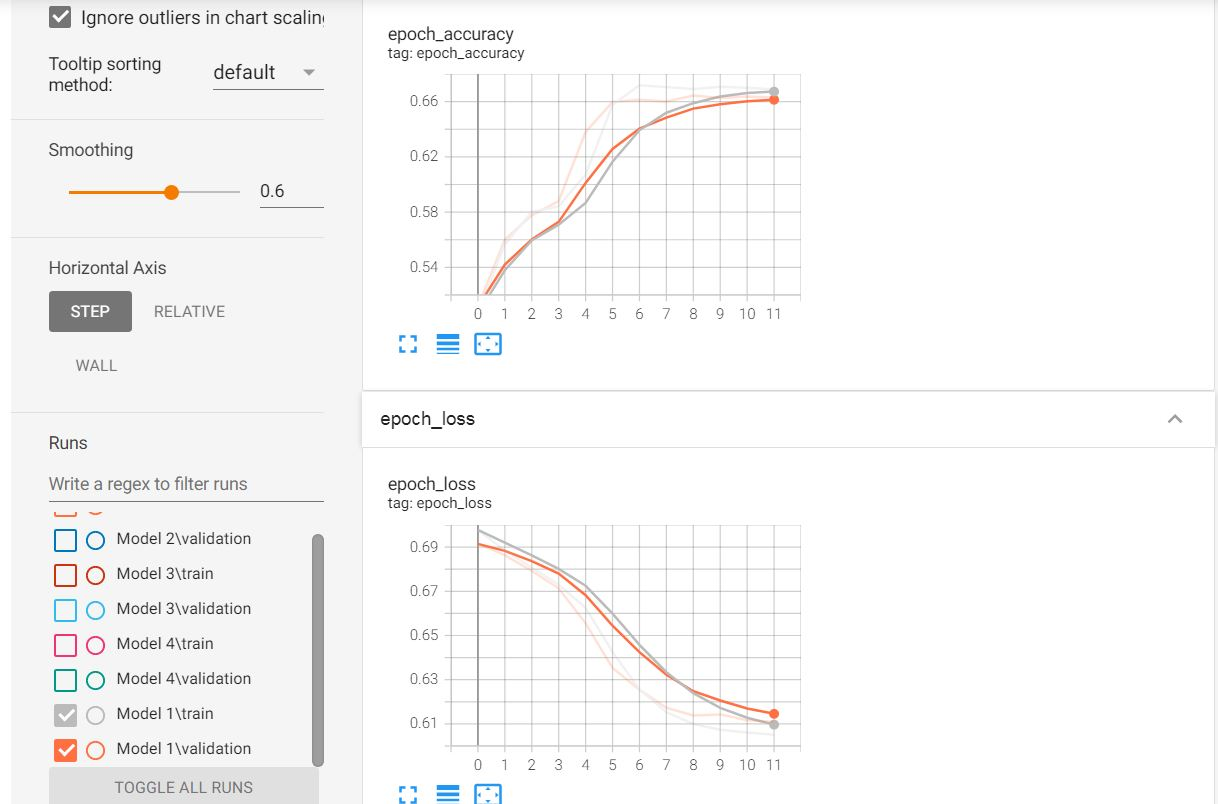

In [46]:
from IPython.display import Image
Image(filename='Model1.png',width=800, height=400)

## Model-2

In [28]:
#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='relu', kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.RandomUniform(0,1))(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

lrschedule = LearningRateScheduler(changeLearningRate, verbose= 1)

filepath = "D:\ipython notebook\Working with callbacks\model\model_save5/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1)

log_dir="D:\ipython notebook\Working with callbacks\logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

callback_list=[metric,auc_score,checkpoint,Terminate,earlystop,lrschedule,tensorboard_callback]

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 20, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([callback_list]))

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 2s 2ms/step - loss: 0.6939 - accuracy: 0.5032 - val_loss: 0.6882 - val_accuracy: 0.5333
f1_score: 0.5333
auc_train: 0.5421 - auc_val: 0.5455

Epoch 00001: val_accuracy improved from -inf to 0.53333, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-01-0.5333.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 1s 1ms/step - loss: 0.6856 - accuracy: 0.5316 - val_loss: 0.6831 - val_accuracy: 0.5670
f1_score: 0.5670
auc_train: 0.5882 - auc_val: 0.5827

Epoch 00002: val_accuracy improved from 0.53333 to 0.56700, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-02-0.5670.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.009499999787658453.
560/560 [======================

### Observations:
After training the above model with relu activation function for the hidden layers and with sigmoid function for the output layer and with uniform initialization of weights, we can notice the following:

1)Maximum accuracy of 0.65267 can be observed in the 10th epoch but this model is the least accurate compared to others.

2)A gradual increase in the val_accuracy can be observed as the epoch number increases.As the val_accuracy starts to move sideways then decreasing the learning rate might help increasing the val_accuracy.

3)The increase in accuracy and reduction of loss is comparatively low as regard to other models.

##### Tensorboard results for model 2


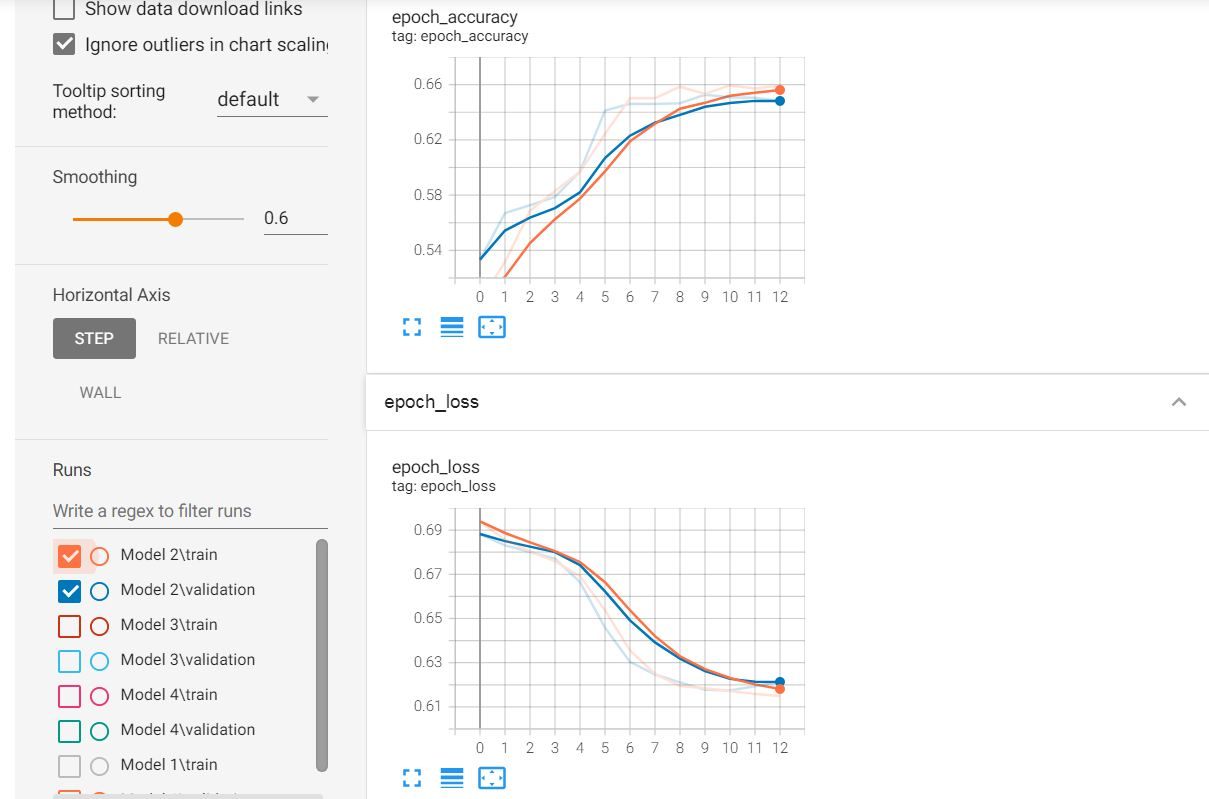

In [49]:
from IPython.display import Image
Image(filename='Model2.png',width=800, height=400)

## Model-3

In [35]:
#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='relu', kernel_initializer= tf.keras.initializers.he_uniform())(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.he_uniform())(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

lrschedule = LearningRateScheduler(changeLearningRate, verbose= 1)

filepath = "D:\ipython notebook\Working with callbacks\model\model_save5/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1)

log_dir="D:\ipython notebook\Working with callbacks\logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

callback_list=[metric,auc_score,checkpoint,Terminate,earlystop,lrschedule,tensorboard_callback]

optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 20, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([callback_list]))

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 2s 2ms/step - loss: 0.6843 - accuracy: 0.5774 - val_loss: 0.6602 - val_accuracy: 0.6095
f1_score: 0.6095
auc_train: 0.6751 - auc_val: 0.6686

Epoch 00001: val_accuracy improved from -inf to 0.60950, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-01-0.6095.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 1s 1ms/step - loss: 0.6447 - accuracy: 0.6390 - val_loss: 0.6335 - val_accuracy: 0.6548
f1_score: 0.6548
auc_train: 0.7209 - auc_val: 0.7125

Epoch 00002: val_accuracy improved from 0.60950 to 0.65483, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-02-0.6548.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.009499999787658453.
560/560 [======================

### Observations:
After training the above model with relu activation function for the hidden layers and with sigmoid function for the output layer and with he initialization of weights, we can notice the following:

1)Maximum accuracy of 0.66400 can be observed in the 7th epoch.

2)As Epoch number increases, val_loss decreases

##### Tensorboard results for model 3


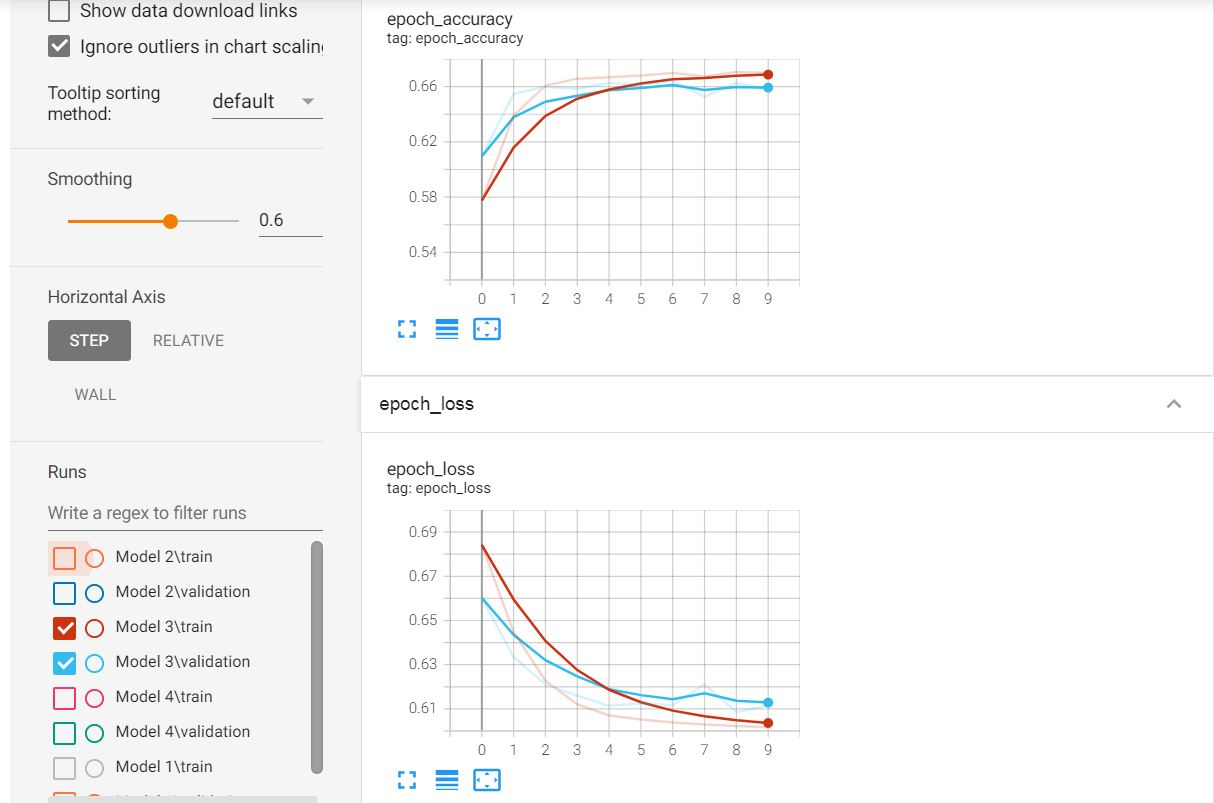

In [48]:
from IPython.display import Image
Image(filename='Model3.png',width=800, height=400)

## Model-4

In [39]:
#input layer
input_layer = Input(shape=(2,))

#dense layer
layer1 = Dense(5, activation='tanh', kernel_initializer= tf.keras.initializers.GlorotNormal())(input_layer)

#output layer
output = Dense(1,activation = 'sigmoid',kernel_initializer= tf.keras.initializers.GlorotNormal())(layer1)

#Creating a model
model = Model(inputs=input_layer,outputs=output)

lrschedule = LearningRateScheduler(changeLearningRate, verbose= 1)

filepath = "D:\ipython notebook\Working with callbacks\model\model_save5/weights-{epoch:02d}-{val_accuracy:.4f}.hdf5"
checkpoint = ModelCheckpoint(filepath=filepath, monitor='val_accuracy',  verbose=1, save_best_only=True, mode='auto')

earlystop = EarlyStopping(monitor='val_accuracy', min_delta=0, patience=3, verbose=1)

log_dir="D:\ipython notebook\Working with callbacks\logs/fit/" + datetime.datetime.now().strftime("%Y%m%d-%H%M%S")
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=log_dir, histogram_freq=1, write_graph=True,write_grads=True)

callback_list=[metric,auc_score,checkpoint,Terminate,earlystop,lrschedule,tensorboard_callback]

#optimizer = tf.keras.optimizers.Adagrad(learning_rate=0.001,initial_accumulator_value=0.1,epsilon=1e-07,name="Adagrad")
optimizer = tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9, nesterov=False, name="SGD")

model.compile(optimizer=optimizer, loss='BinaryCrossentropy', metrics=['accuracy'])

model.fit(X_train,y_train, epochs = 20, validation_data= (X_test,y_test), batch_size = 25 ,callbacks = ([callback_list]))

Epoch 1/20

Epoch 00001: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 1s 2ms/step - loss: 0.6982 - accuracy: 0.5145 - val_loss: 0.6905 - val_accuracy: 0.5498
f1_score: 0.5498
auc_train: 0.5709 - auc_val: 0.5665

Epoch 00001: val_accuracy improved from -inf to 0.54983, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-01-0.5498.hdf5
Epoch 2/20

Epoch 00002: LearningRateScheduler setting learning rate to 0.009999999776482582.
560/560 [==============================] - 1s 1ms/step - loss: 0.6875 - accuracy: 0.5550 - val_loss: 0.6824 - val_accuracy: 0.5883
f1_score: 0.5883
auc_train: 0.6104 - auc_val: 0.6116

Epoch 00002: val_accuracy improved from 0.54983 to 0.58833, saving model to D:\ipython notebook\Working with callbacks\model\model_save5\weights-02-0.5883.hdf5
Epoch 3/20

Epoch 00003: LearningRateScheduler setting learning rate to 0.009499999787658453.
560/560 [======================

### Observations:

Out of all 4 models, model 4 gives the maximum accuracy of 0.6655 and F1 score of 0.6705 when tanh activation functions are used for hidden layers and sigmoid function is used for ouput layer with Glorot_Normal initializations.

As the epoch number increases, val_loss reduces gradually therefore convergence can be observed for higher epochs.

When the learning rate decreases, a significant increase in val_accuracy can be observed as well as reduction in val_loss.

##### Tensorboard results for model 4


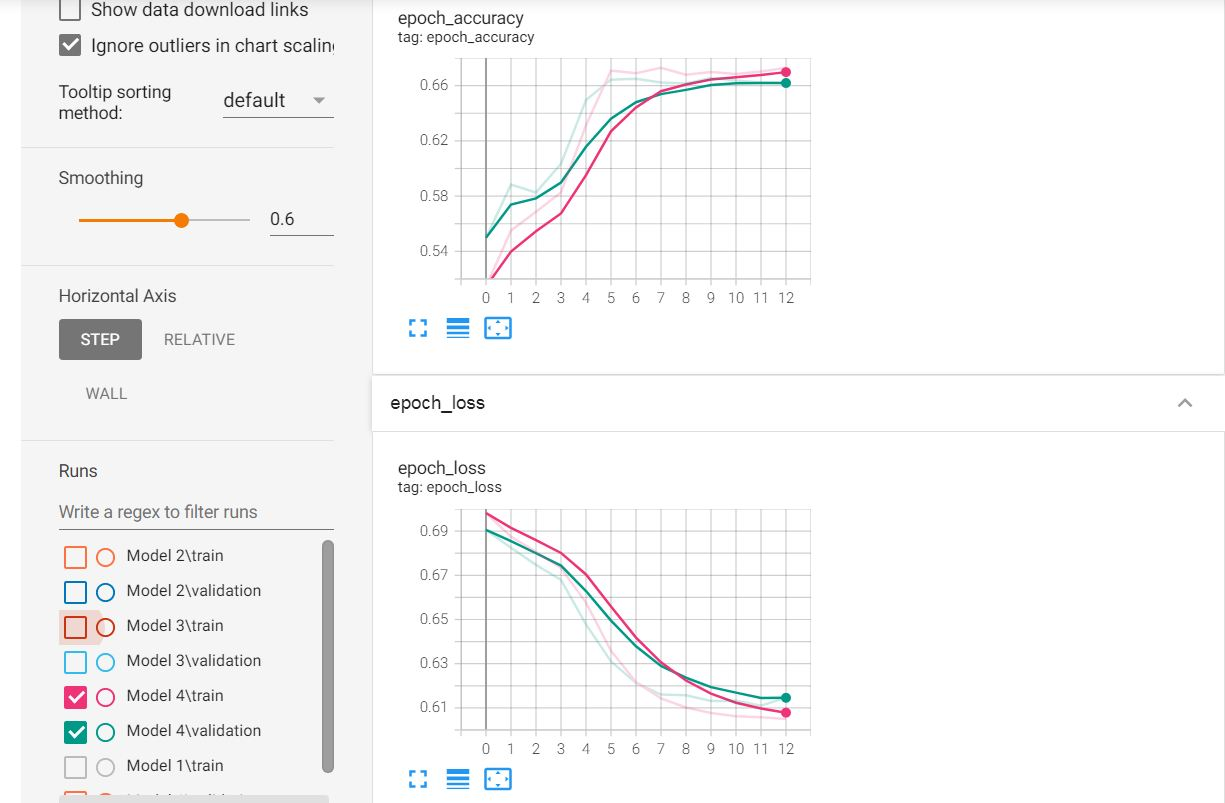

In [47]:
from IPython.display import Image
Image(filename='Model4.png',width=800, height=400)

#### Tensorboard 

In [42]:
%tensorboard --logdir logs/fit